<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

fatal: destination path 'autism-info-llm-comparison' already exists and is not an empty directory.


In [2]:
import pandas as pd

df = pd.read_csv("autism-info-llm-comparison/data.csv")
df.head()

,Questions,WHO,ChatGPT 4.0,ChatGPT Vision,ScholarGPT,Gemini,Llama3,Bing AI (Copilot),Google Palm,Claude,ReKa Core,Solar Mini
0,What is autism spectrum disorders?,Autism spectrum disorders (ASD) are a diverse ...,Autism Spectrum Disorders (ASD) are a group of...,Autism Spectrum Disorders (ASD) are a group of...,Autism Spectrum Disorders (ASD) are a group of...,Autism spectrum disorder (ASD) is a developmen...,Autism Spectrum Disorders (ASD) is a neurodeve...,Autism Spectrum Disorders (ASD) are a group of...,Autism spectrum disorders (ASD) are a group of...,Autism Spectrum Disorder (ASD) is a complex ne...,Autism Spectrum Disorder (ASD) is a neurodevel...,Autism spectrum disorder (ASD) is a neurodevel...
1,Which are the abilities and need of individual...,The abilities and needs of autistic people var...,Individuals with autism spectrum disorders (AS...,Abilities:\n\nStrong attention to detail and p...,Abilities of Individuals with Autism Spectrum ...,Autism spectrum disorder (ASD) is a developmen...,Individuals with Autism Spectrum Disorders (AS...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders (AS...,Individuals with autism spectrum disorders (AS...,Abilities of Individuals with Autism Spectrum ...,Individuals with autism spectrum disorders oft...
2,Which are the co-occurring conditions of autis...,People with autism often have co-occurring con...,Common co-occurring conditions in individuals ...,Common co-occurring conditions with Autism Spe...,Individuals with Autism Spectrum Disorders (AS...,People with autism spectrum disorder (ASD) oft...,Common co-occurring conditions with Autism Spe...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders (AS...,Co-occurring conditions frequently associated ...,Individuals with Autism Spectrum Disorders (AS...,Individuals with autism spectrum disorders can...
3,What is the epidemiology of autism spectrum di...,It is estimated that worldwide about 1 in 100 ...,The epidemiology of autism spectrum disorders ...,The epidemiology of Autism Spectrum Disorders ...,The epidemiology of Autism Spectrum Disorders ...,The epidemiology of autism spectrum disorder (...,The epidemiology of Autism Spectrum Disorders ...,What is the epidemiology of autism spectrum di...,The epidemiology of autism spectrum disorders ...,Here's a concise overview of the epidemiology ...,Epidemiology of Autism Spectrum Disorders (ASD...,The epidemiology of autism spectrum disorders ...
4,What are the causes of autism spectrum disorders?,Available scientific evidence suggests that th...,The causes of autism spectrum disorders (ASD) ...,The causes of Autism Spectrum Disorders (ASD) ...,The exact causes of Autism Spectrum Disorders ...,The exact cause of autism spectrum disorder (A...,The exact causes of Autism Spectrum Disorders ...,The exact causes of Autism Spectrum Disorders ...,The exact causes of autism spectrum disorders ...,The causes of autism spectrum disorders (ASD) ...,The causes of Autism Spectrum Disorders (ASD) ...,The exact causes of autism spectrum disorders ...


In [3]:
llm_answers = df.iloc[:, 2:]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

from sklearn.metrics.pairwise import cosine_similarity

similarities = {}

for llm in llm_answers.columns:
    combined_texts = df["WHO"].tolist() + df[llm].tolist()
    tfidf_matrix = vectorizer.fit_transform(combined_texts)

    sim_scores = cosine_similarity(tfidf_matrix[:len(df)], tfidf_matrix[len(df):])
    similarities[llm] = [sim[0] for sim in sim_scores]

similarity_df = pd.DataFrame(similarities)

similarity_question_means = similarity_df.mean(axis=1)

similarity_df["Mean"] = similarity_question_means

print(similarity_df)

   ChatGPT 4.0  ChatGPT Vision  ScholarGPT    Gemini    Llama3  \
0     0.230153        0.197395    0.261180  0.163255  0.176877   
1     0.142553        0.205802    0.249026  0.201706  0.106947   
2     0.043740        0.088680    0.179053  0.138419  0.082409   
3     0.052690        0.111080    0.083055  0.072477  0.104526   
4     0.072900        0.083428    0.116019  0.083612  0.066576   
5     0.148055        0.176495    0.266353  0.233069  0.143452   
6     0.099794        0.102436    0.180990  0.193606  0.102267   
7     0.083807        0.100186    0.178260  0.098744  0.108245   

   Bing AI (Copilot)  Google Palm    Claude  ReKa Core  Solar Mini      Mean  
0           0.255723     0.264478  0.242060   0.220274    0.183908  0.219530  
1           0.231586     0.175113  0.193434   0.289900    0.167220  0.196329  
2           0.179201     0.086105  0.113486   0.120137    0.174119  0.120535  
3           0.073784     0.123590  0.102072   0.109933    0.089422  0.092263  
4         

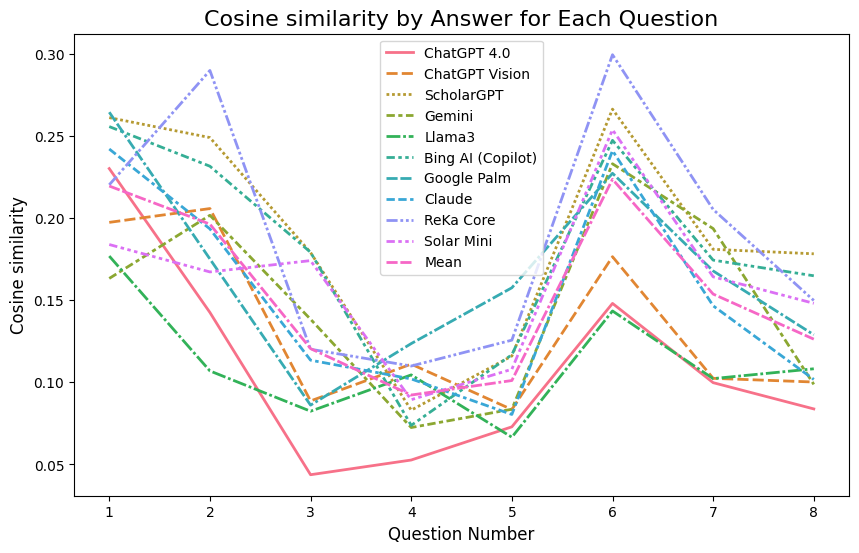

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))


palette = sns.color_palette("crest")[1:]

sns.set_palette(palette)
sns.lineplot(data=similarity_df, linewidth=2)

plt.title("Cosine similarity by Answer for Each Question", fontsize=16)
plt.xlabel("Question Number", fontsize=12)
plt.ylabel("Cosine similarity", fontsize=12)
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)])

plt.show()

In [6]:
similarity_means = similarity_df.mean()
print(similarity_means)

ChatGPT 4.0          0.109211
ChatGPT Vision       0.133188
ScholarGPT           0.189242
Gemini               0.148111
Llama3               0.111412
Bing AI (Copilot)    0.180466
Google Palm          0.166367
Claude               0.152615
ReKa Core            0.190063
Solar Mini           0.161100
Mean                 0.154177
dtype: float64


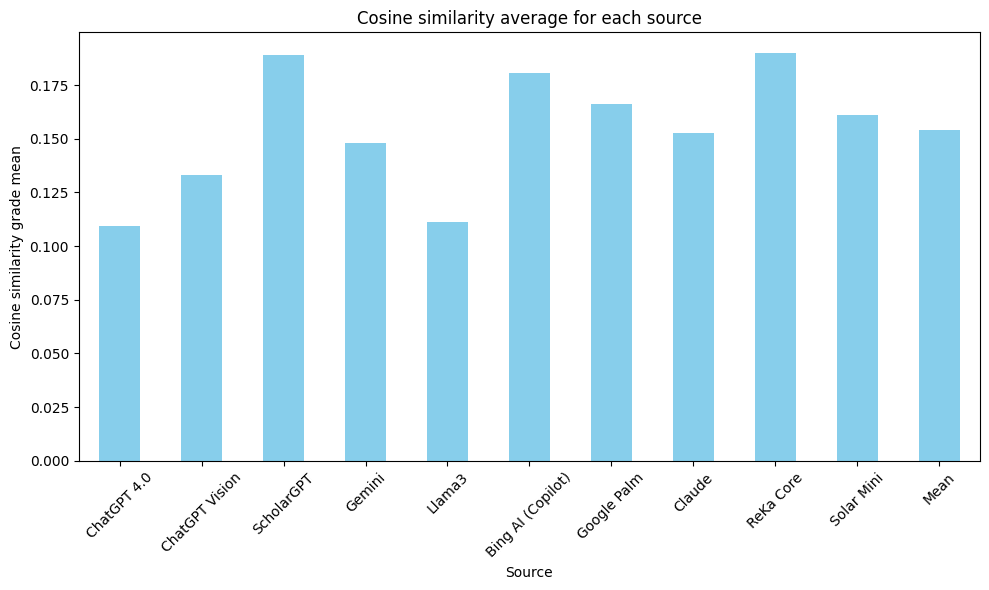

In [7]:
plt.figure(figsize=(10, 6))
similarity_means.plot(kind='bar', color='skyblue')
plt.title('Cosine similarity average for each source')
plt.xlabel('Source')
plt.ylabel('Cosine similarity grade mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

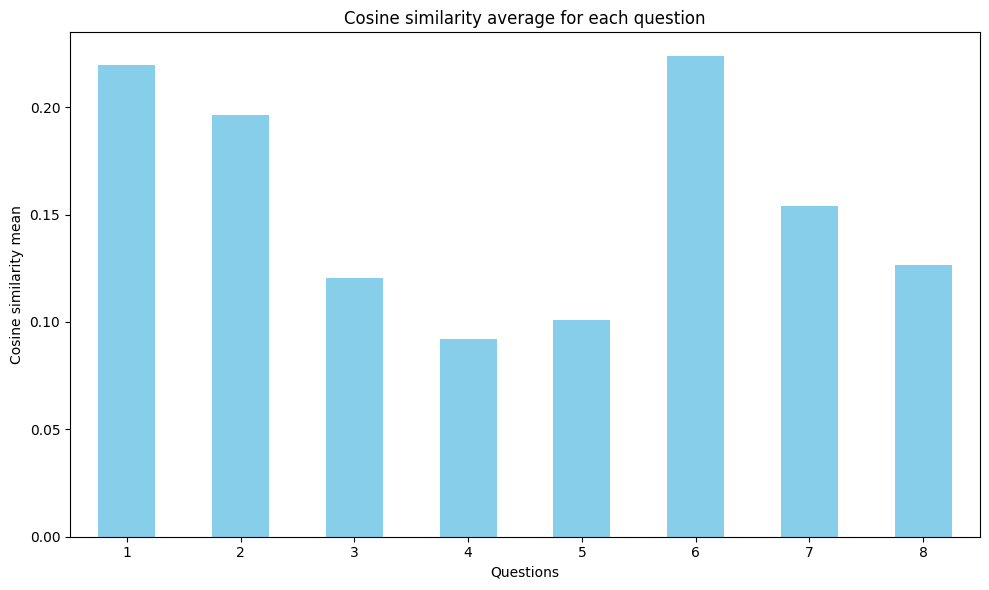

In [8]:
plt.figure(figsize=(10, 6))
similarity_question_means.plot(kind='bar', color='skyblue')
plt.title('Cosine similarity average for each question')
plt.xlabel('Questions')
plt.ylabel('Cosine similarity mean')
plt.xticks(ticks=range(8), labels=[str(i+1) for i in range(8)], rotation=0)
plt.tight_layout()
plt.show()